# Plots for Pat's paper

In [1]:
# Load the amrwind-frontend module
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['../',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Important header information                                                                                                                                               
import postprolib as pp
# Load the libraries                                                                                                                                                         
import postproamrwindsample as ppsample
import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import pickle
import pandas as pd

# Make all plots inline 
%matplotlib inline

In [2]:
extractvar = lambda xrds, var, i : xrds[var][i,:].data.reshape(tuple(xrds.attrs['ijk_dims'][::-1]))

def loadPickle(picklefname):
    pfile = open(picklefname, 'rb')
    db   = pickle.load(pfile)
    x    = db['x']
    y    = db['y']
    z    = db['z']
    vx   = db['vx']
    vy   = db['vy']
    vz   = db['vz']
    time = db['time']
    pfile.close()
    return x, y, z, vx, vy, vz, time

def avgfield(v, mintime, maxtime):
    avgv = None
    iavg = 0
    for itime, vfield in v.items():
        if (mintime<=itime) and (itime<=maxtime):
            iavg += 1
            if avgv is None:
                avgv = vfield
            else:
                avgv += vfield
    #print(iavg)
    return avgv/float(iavg)

def setfigtextsize(ax, fsize):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.yaxis.get_offset_text()] + ax.get_xticklabels() + ax.get_yticklabels() ):
        item.set_fontsize(fsize)

In [3]:
# Load all turbine locations
csvfile = '../UnstableABL_farmrun_turbines.csv'
# Load the data from the database of all turbines
allturbsdf = pd.read_csv(csvfile, low_memory=False)

allturbsxy = []
for x in allturbsdf.iterrows():
    xy = [float(x[1][' x']), float(x[1][' y'])]
    allturbsxy.append(xy)
    
allturbsxy = np.array(allturbsxy)

In [4]:
rundir='/gpfs/alpine/cfd162/scratch/lcheung/AWAKEN/testturbs/post_processing'

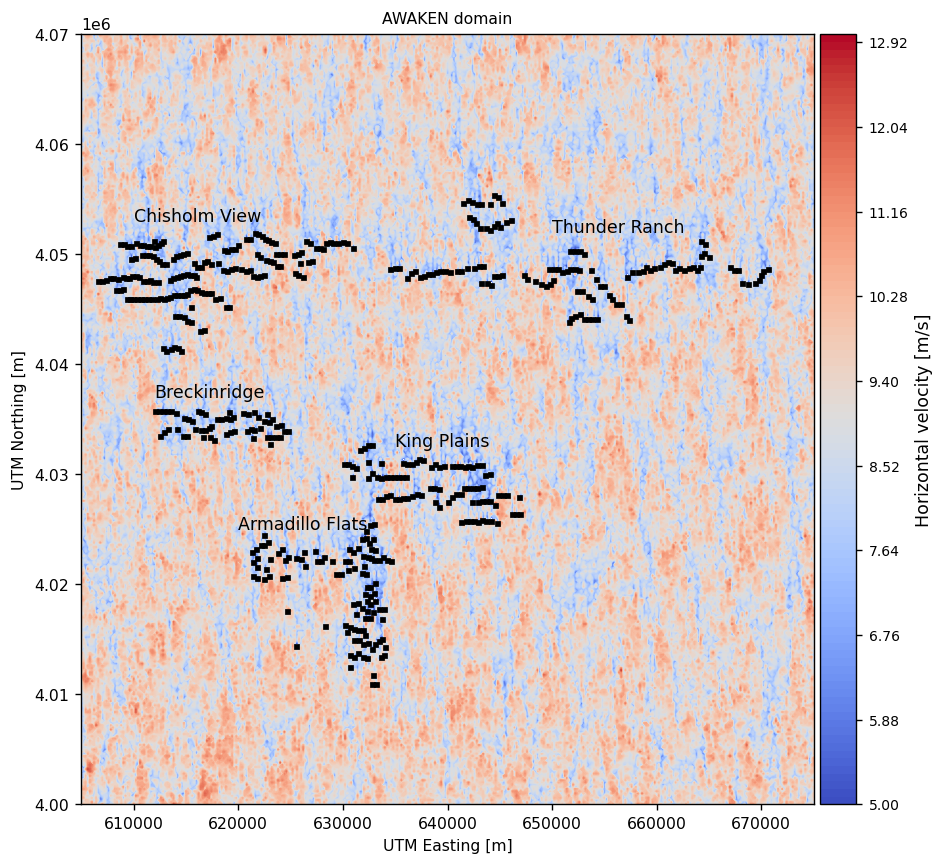

In [5]:
# Plot the big farm picture
vlevels = np.linspace(5,13,101)
fontsize = 9

ncfile='farm_z90_64500.nc'
itime=900
fig, axs = plt.subplots(1,1,figsize=(8,8), dpi=125, sharey=True)
ax=axs
groups=ppsample.getGroups(ppsample.loadDataset(rundir+'/'+ncfile))
with xr.open_dataset(rundir+'/'+ncfile, group=groups[0]) as ds:
    xm = ds['coordinates'].data[:,0].reshape(tuple(ds.attrs['ijk_dims'][1::-1]))
    ym = ds['coordinates'].data[:,1].reshape(tuple(ds.attrs['ijk_dims'][1::-1]))
    dtime=xr.open_dataset(rundir+'/'+ncfile)
    ds = ds.assign_coords(coords={'xm':(['x','y'], xm),
                                  'ym':(['x','y'], ym),
                                  'time':dtime['time'],
                                  })
    dtime.close()
    vy = extractvar(ds, 'velocityy', itime)
    vx = extractvar(ds, 'velocityx', itime)
    vh = np.sqrt(vx**2 + vy**2)
    
c=ax.contourf(ds['xm'], ds['ym'], vh[0,:,:], levels=vlevels, cmap='coolwarm')
ax.plot(allturbsxy[:,0], allturbsxy[:,1], 'ks', ms=2)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
cbar.set_label('Horizontal velocity [m/s]')
cbar.ax.tick_params(labelsize=fontsize-1)

# label farms
ax.text(635000, 4.0325E6, 'King Plains')
ax.text(620000, 4.025E6, 'Armadillo Flats')
ax.text(650000, 4.052E6, 'Thunder Ranch')
ax.text(612000, 4.037E6, 'Breckinridge')
ax.text(610000, 4.053E6, 'Chisholm View')

ax.set_aspect('auto')
ax.set_xlim([605000, 675000])
ax.set_ylim([4000000, 4070000])
ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')
ax.set_title('AWAKEN domain')
setfigtextsize(ax, fontsize)

In [6]:
farmfiles = [{'title':'King Plains',     'ncfile':'KP_z090hh_64500.nc', 'figsize':(8,4), 'xlim':[630000, 650000], 'ylim':[4.025E6, 4.035E6]},
             {'title':'Armadillo Flats', 'ncfile':'AF_z080hh_64500.nc', 'figsize':(5,5), 'xlim':[620000, 635000], 'ylim':[4.010E6, 4.025E6]},
             {'title':'Thunder Ranch', 'ncfile':'TR_z090hh_64500.nc', 'figsize':(8,3), 'xlim':[640000, 670000], 'ylim':[4.045E6, 4.055E6]},
             {'title':'Chisholm View', 'ncfile':'CV_z080hh_64500.nc', 'figsize':(6,4), 'xlim':[605000, 625000], 'ylim':[4.041E6, 4.053E6]},
             {'title':'Breckinridge', 'ncfile':'BR_z080hh_64500.nc', 'figsize':(6,3), 'xlim':[610000, 625000], 'ylim':[4.032E6, 4.037E6]},
             
            ]

Loading farm King Plains
Loading farm Armadillo Flats
Loading farm Thunder Ranch
Loading farm Chisholm View
Loading farm Breckinridge


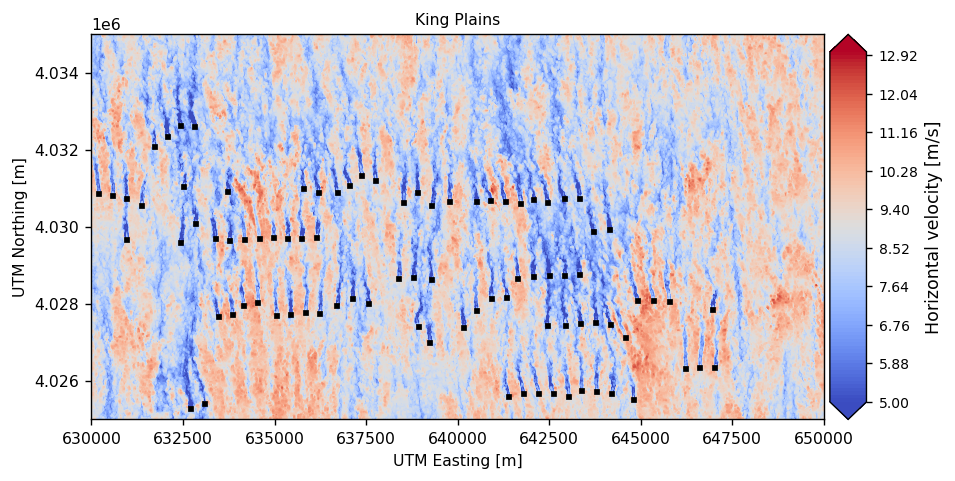

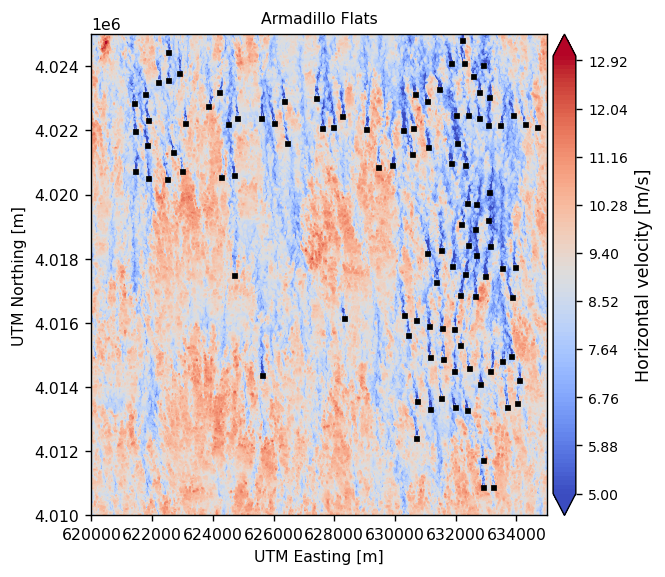

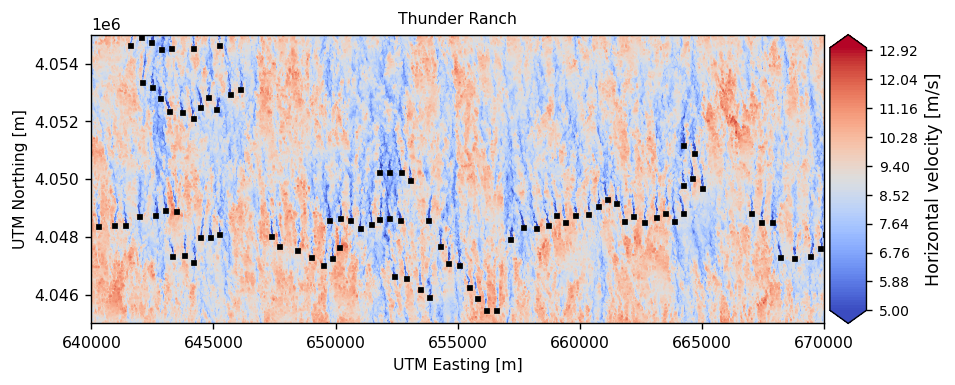

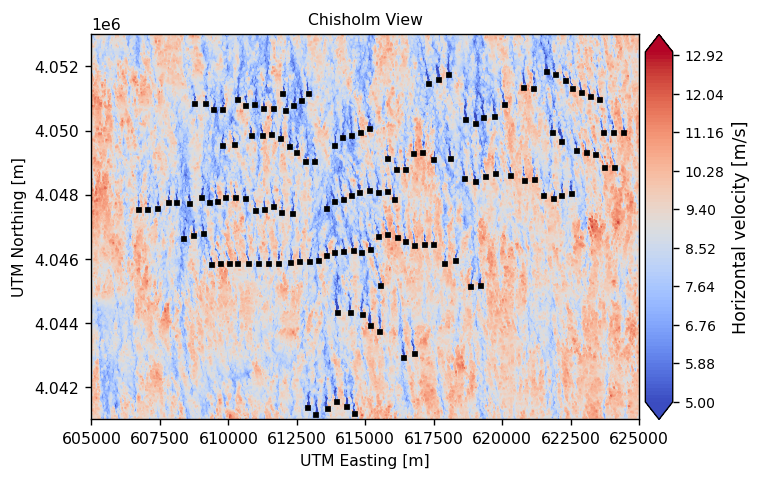

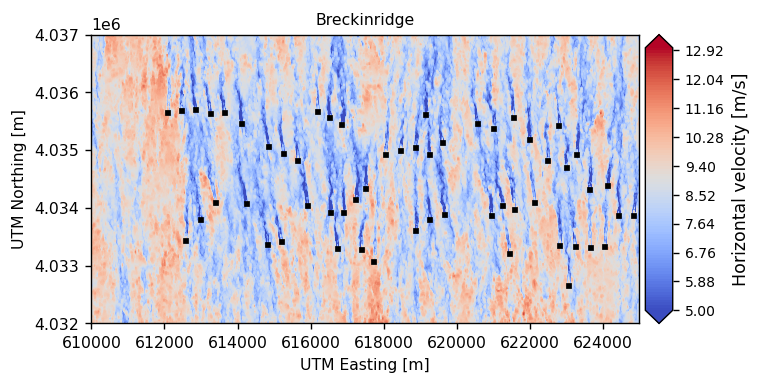

In [7]:
for farm in farmfiles:
    print('Loading farm '+farm['title'])
    fig, axs = plt.subplots(1,1,figsize=farm['figsize'], dpi=125, sharey=True)
    ax=axs
    groups=ppsample.getGroups(ppsample.loadDataset(rundir+'/'+farm['ncfile']))
    with xr.open_dataset(rundir+'/'+farm['ncfile'], group=groups[0]) as ds:
        xm = ds['coordinates'].data[:,0].reshape(tuple(ds.attrs['ijk_dims'][1::-1]))
        ym = ds['coordinates'].data[:,1].reshape(tuple(ds.attrs['ijk_dims'][1::-1]))
        dtime=xr.open_dataset(rundir+'/'+farm['ncfile'])
        ds = ds.assign_coords(coords={'xm':(['x','y'], xm),
                                      'ym':(['x','y'], ym),
                                      'time':dtime['time'],
                                     })
        dtime.close()
        vy = extractvar(ds, 'velocityy', itime)
        vx = extractvar(ds, 'velocityx', itime)
        vh = np.sqrt(vx**2 + vy**2)
        
        c=ax.contourf(ds['xm'], ds['ym'], vh[0,:,:], levels=vlevels, cmap='coolwarm', extend='both')
        
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar=fig.colorbar(c, ax=ax, cax=cax)
        cbar.set_label('Horizontal velocity [m/s]')
        cbar.ax.tick_params(labelsize=fontsize-1)
    ax.plot(allturbsxy[:,0], allturbsxy[:,1], 'ks', ms=2)
    ax.set_aspect('auto')
    ax.set_ylim(farm['ylim'])
    ax.set_xlim(farm['xlim'])
    ax.set_xlabel('UTM Easting [m]')
    ax.set_ylabel('UTM Northing [m]')
    ax.set_title(farm['title'])
    setfigtextsize(ax, fontsize)